<a href="https://colab.research.google.com/github/nathanganser/udacity-data-science-1/blob/main/Airbnb_Udacity_Exerice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Udacity Project
The goal of this project is to answer the following questions:
- `What is the occupacy rate of airbnb's on average (what about the top 10% of airbnbs? What's the correlation to reviews?)`
- How much do prices change over the year? Can we detect conferences based on short spikes in prices?
- What keywords come up most often in airbnb names? What about the 10% that are the most booked?


# Install dependencies

In [1]:
pip install pandas

Open the files and preview them

In [38]:
import pandas as pd
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')


# open files
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [17]:
# We start by answering the first question
# "What is the occupacy rate of airbnb's on average?"
calendar.head()


import pandas as pd

# Get the earliest and latest dates
earliest_date = calendar['date'].min()
latest_date = calendar['date'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

# Convert 't' to 1 and 'f' to 0
calendar['available_numeric'] = calendar['available'].map({'t': 1, 'f': 0})

# Calculate the availability rate for each listing
availability_rate = calendar.groupby('listing_id')['available_numeric'].mean()

# Sort the listings by availability rate in ascending order
least_available_listings = availability_rate.sort_values().head(10)

review_counts = reviews.groupby('listing_id').size()

# Merge the availability rates with the review counts
merged_data = pd.merge(availability_rate.reset_index(), review_counts.reset_index(), on='listing_id', how='left')
merged_data.columns = ['listing_id', 'availability_rate', 'review_count']


# Filter listings with availability rate > 0 and at least 50 reviews
filtered_listings = merged_data[(merged_data['availability_rate'] > 0) & (merged_data['review_count'] >= 50)]

# Sort the filtered listings by availability rate in ascending order
least_available_listings = filtered_listings.sort_values('availability_rate').head(500)

print("Least available Airbnb listings with review counts (filtered):")
print(least_available_listings)


average_availability_rate_top = least_available_listings['availability_rate'].mean()
average_availability_rate = merged_data['availability_rate'].mean()

print(f"Avg availability top: {average_availability_rate_top}")
print(f"Avg availability all: {average_availability_rate}")




Earliest date: 2016-01-04
Latest date: 2017-01-02
listing_id
3335        0.846575
4291        1.000000
5682        0.846575
6606        1.000000
7369        0.145205
              ...   
10332096    1.000000
10334184    0.989041
10339144    0.000000
10339145    1.000000
10340165    0.980822
Name: available_numeric, Length: 3818, dtype: float64
Least available Airbnb listings with review counts (filtered):
      listing_id  availability_rate  review_count
394      1030615           0.038356          83.0
45         53867           0.054795         287.0
1057     3552523           0.057534          84.0
897      3031415           0.057534         107.0
622      1796302           0.068493         150.0
...          ...                ...           ...
559      1593939           1.000000          69.0
201       447523           1.000000          93.0
568      1602488           1.000000         118.0
224       496074           1.000000          80.0
1238     4022127           1.000000      

# Conclusion
The top airbnbs (with +50 reviews) have an average availability of 75% and the average airbnb of 67%.

This was confusing and I expected something opposite, with top airbnbs being less available, but other factors might play into this (such as price)

# Further exploration
"What factors correlate with low availability"

In [29]:
import pandas as pd

# Convert 't' to 1 and 'f' to 0
calendar['available_numeric'] = calendar['available'].map({'t': 1, 'f': 0})

# Calculate the availability rate for each listing
availability_rate = calendar.groupby('listing_id')['available_numeric'].mean()

# Count the number of reviews for each listing
review_counts = reviews.groupby('listing_id').size().rename('review_count')

# Select relevant numerical columns from the listings DataFrame
numerical_columns = ['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
                     'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                     'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy',
                     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']

listings_numerical = listings[numerical_columns]

# Rename 'id' column to 'listing_id' if necessary
if 'id' in listings_numerical.columns:
    listings_numerical = listings_numerical.rename(columns={'id': 'listing_id'})

# Reset the index of availability_rate and review_counts if 'listing_id' is not the index
if 'listing_id' not in availability_rate.index.name:
    availability_rate = availability_rate.reset_index()
if 'listing_id' not in review_counts.index.name:
    review_counts = review_counts.reset_index()

# Merge availability rates, review counts, and numerical columns
merged_data = pd.merge(availability_rate, review_counts, on='listing_id', how='left')
merged_data = pd.merge(merged_data, listings_numerical, on='listing_id', how='left')
merged_data.columns = ['listing_id', 'availability_rate', 'review_count'] + numerical_columns[1:]

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()



# Print the correlation values with the availability rate
print("\nCorrelation with Availability Rate:")
print(correlation_matrix['availability_rate'].sort_values(ascending=False))


Correlation with Availability Rate:
availability_rate                 1.000000
availability_365                  1.000000
availability_90                   0.619355
availability_60                   0.572857
availability_30                   0.503881
calculated_host_listings_count    0.136881
number_of_reviews                 0.094273
review_count                      0.086502
minimum_nights                    0.009087
maximum_nights                    0.007265
reviews_per_month                 0.002312
bathrooms                        -0.002326
beds                             -0.009773
review_scores_checkin            -0.013510
review_scores_communication      -0.021564
review_scores_cleanliness        -0.022539
accommodates                     -0.031535
review_scores_location           -0.034956
review_scores_rating             -0.038600
review_scores_accuracy           -0.039761
bedrooms                         -0.049788
review_scores_value              -0.066565
listing_id       

<ipython-input-29-41757b194583>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


Interesting, it seems indeed like the number of reviews increases the availablity_rate (0.09), although the value of the reviews (review_scores_value) decreases it, which makes sense.
**The takeaway is that number of reviews does not equal good reviews!**


# Price changes over the year
Let us now look at price changes over the year and understand how much they change.

In [34]:
import pandas as pd

# Convert the 'price' column to numeric, removing the '$' symbol and commas
calendar['price'] = pd.to_numeric(calendar['price'], errors='coerce')

# Calculate the mean, median, and standard deviation of price for each listing
price_stats = calendar.groupby('listing_id')['price'].agg(['mean', 'median', 'std']).reset_index()

# Calculate the coefficient of variation (CV) for each listing
price_stats['coefficient_of_variation'] = price_stats['std'] / price_stats['mean']

# Rename the columns for clarity
price_stats.columns = ['listing_id', 'mean_price', 'median_price', 'std_price', 'coefficient_of_variation']

# Sort the DataFrame by coefficient of variation in descending order
price_stats_sorted = price_stats.sort_values('coefficient_of_variation', ascending=False)

# Print the 10 listings with the highest coefficient of variation
print("Top 10 listings with the highest coefficient of variation:")
print(price_stats_sorted.head(10))

Top 10 listings with the highest coefficient of variation:
      listing_id  mean_price  median_price   std_price  \
2675     7735282  122.224299          87.0   69.409546   
1060     3561237  278.432877         172.0  147.008406   
2357     7074024   41.858974          28.0   21.570015   
921      3143175  117.000000          79.0   60.185719   
1947     6218849   41.819672          29.0   20.795439   
822      2715623  184.467742         164.0   91.531967   
3710     9922335  276.759669         256.0  131.031536   
579      1652107  202.642424         142.0   94.949470   
1158     3858725  171.720670         122.0   80.087243   
978      3312406  169.486804         129.0   74.864489   

      coefficient_of_variation  
2675                  0.567887  
1060                  0.527985  
2357                  0.515302  
921                   0.514408  
1947                  0.497265  
822                   0.496195  
3710                  0.473449  
579                   0.468557  
1158 

So we see that the mean price of an airbnb with high CV is around $100-200 and that the standard deviation is around 50-100.

Let's now see if we can identify the dates of conferences by looking at price spikes accross all listings on specific dates.

In [37]:
import pandas as pd

# Convert the 'price' column to numeric, handling non-numeric values
calendar['price'] = pd.to_numeric(calendar['price'], errors='coerce')

# Calculate the mean and standard deviation of price for each listing
listing_stats = calendar.groupby('listing_id')['price'].agg(['mean', 'std']).reset_index()

# Merge the listing statistics with the calendar DataFrame
calendar_merged = pd.merge(calendar, listing_stats, on='listing_id', how='left')

# Identify the dates where price increased by more than one standard deviation
calendar_merged['price_spike'] = (calendar_merged['price'] > calendar_merged['mean'] + calendar_merged['std'])

# Count the number of listings with price spikes on each date
price_spike_counts = calendar_merged.groupby('date')['price_spike'].sum().reset_index()

# Calculate the total number of listings on each date
total_listings_per_date = calendar_merged.groupby('date')['listing_id'].nunique().reset_index()

# Merge the price spike counts with the total listings per date
price_spike_percentages = pd.merge(price_spike_counts, total_listings_per_date, on='date', how='left')

# Calculate the percentage of listings with price spikes on each date
price_spike_percentages['percentage'] = price_spike_percentages['price_spike'] / price_spike_percentages['listing_id']

# Filter the dates where more than 15% of listings have price spikes
conference_dates = price_spike_percentages[price_spike_percentages['percentage'] > 0.2]

# Calculate the average coefficient of variation for each identified date
conference_dates_cov = pd.merge(conference_dates, calendar_merged, on='date', how='left')
conference_dates_cov['coefficient_of_variation'] = conference_dates_cov['std'] / conference_dates_cov['mean']
conference_dates_avg_cov = conference_dates_cov.groupby('date')['coefficient_of_variation'].mean().reset_index()

# Print the identified conference dates and the average coefficient of variation
print("Potential conference dates:")
print(conference_dates_avg_cov[['date', 'coefficient_of_variation']])

Potential conference dates:
          date  coefficient_of_variation
0   2016-05-27                  0.074385
1   2016-05-28                  0.074385
2   2016-06-03                  0.074385
3   2016-06-04                  0.074385
4   2016-06-10                  0.074385
5   2016-06-11                  0.074385
6   2016-06-17                  0.074385
7   2016-06-18                  0.074385
8   2016-06-24                  0.074385
9   2016-06-25                  0.074385
10  2016-07-01                  0.074385
11  2016-07-02                  0.074385
12  2016-07-08                  0.074385
13  2016-07-09                  0.074385
14  2016-07-15                  0.074385
15  2016-07-16                  0.074385
16  2016-07-22                  0.074385
17  2016-07-23                  0.074385
18  2016-07-29                  0.074385
19  2016-07-30                  0.074385
20  2016-08-05                  0.074385
21  2016-08-06                  0.074385
22  2016-08-12               

# Keywords that appear most
Now we're interested in finding which keywords appear most in listing names

<ipython-input-42-73e5a64d0db5>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  keywords = listings['name'].str.lower().str.replace('[^a-z\s]', '').str.split()


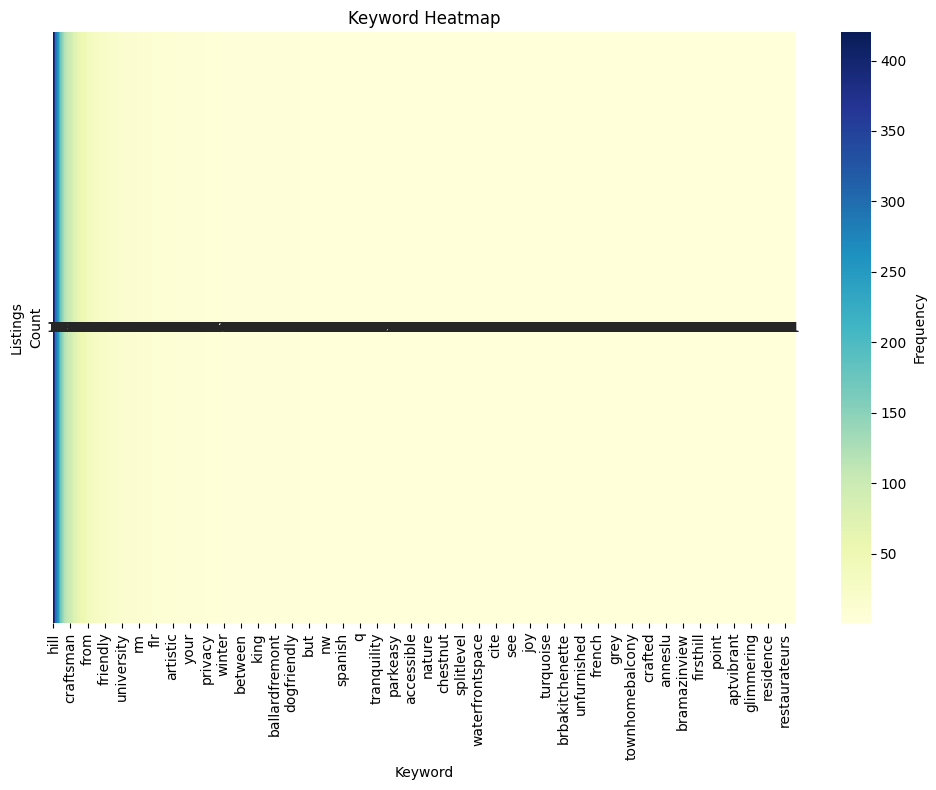

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Extract keywords from the "name" column
keywords = listings['name'].str.lower().str.replace('[^a-z\s]', '').str.split()


# Remove the "in" keyword from the list of keywords
keywords = [[word for word in sublist if word not in ['in', 'seattle']] for sublist in keywords]


# Count the frequency of each keyword
keyword_counts = pd.Series([word for sublist in keywords for word in sublist]).value_counts()

# Create a DataFrame from the keyword counts
keyword_df = pd.DataFrame({'Keyword': keyword_counts.index, 'Count': keyword_counts.values})

# Create a heatmap of the keyword frequencies
plt.figure(figsize=(10, 8))
sns.heatmap(keyword_df.set_index('Keyword').T, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Frequency'})
plt.title('Keyword Heatmap')
plt.xlabel('Keyword')
plt.ylabel('Listings')
plt.tight_layout()
plt.show()

<ipython-input-46-b09eaaf0c179>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  all_keywords = listings['name'].str.lower().str.replace('[^a-z\s]', '').str.split()
<ipython-input-46-b09eaaf0c179>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  high_rated_keywords = high_rated_listings['name'].str.lower().str.replace('[^a-z\s]', '').str.split()


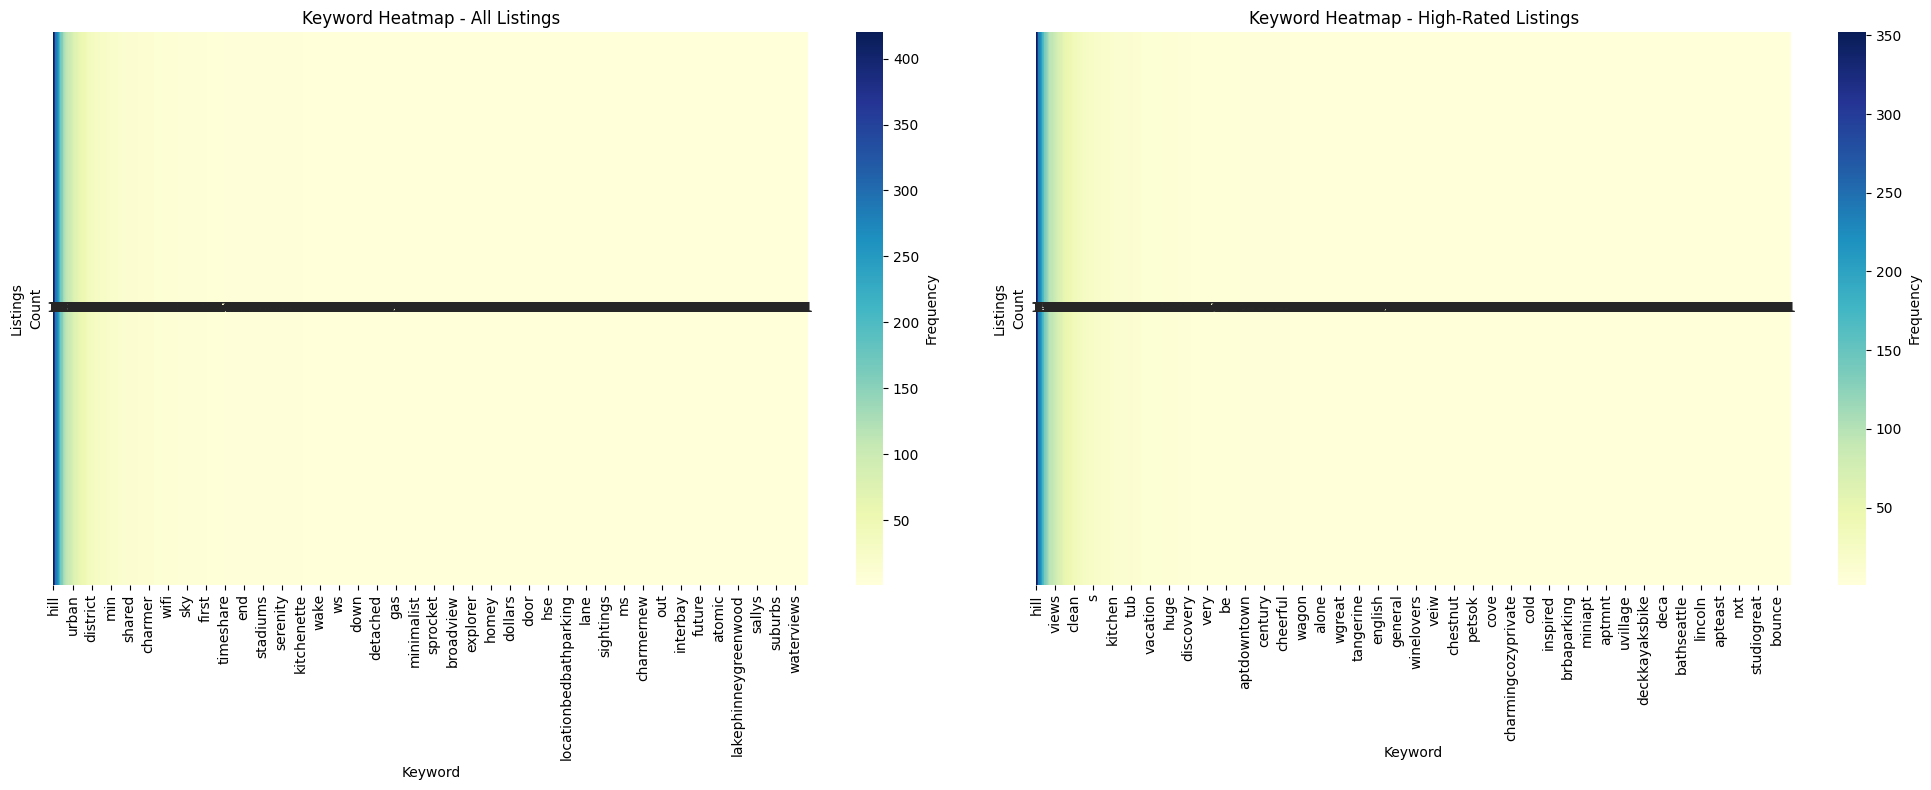

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Extract keywords from the "name" column for all listings
all_keywords = listings['name'].str.lower().str.replace('[^a-z\s]', '').str.split()

# Remove the "in" keyword from the list of keywords for all listings
all_keywords = [[word for word in sublist if word not in ['in', 'seattle']] for sublist in all_keywords]

# Count the frequency of each keyword for all listings
all_keyword_counts = pd.Series([word for sublist in all_keywords for word in sublist]).value_counts()

# Create a DataFrame from the keyword counts for all listings
all_keyword_df = pd.DataFrame({'Keyword': all_keyword_counts.index, 'Count': all_keyword_counts.values})

# Filter listings with review_scores_rating > 4.75
high_rated_listings = listings[listings['review_scores_rating'] > 4.75]

# Extract keywords from the "name" column for high-rated listings
high_rated_keywords = high_rated_listings['name'].str.lower().str.replace('[^a-z\s]', '').str.split()

# Remove the "in" keyword from the list of keywords for high-rated listings
high_rated_keywords = [[word for word in sublist if word not in ['in', 'seattle']] for sublist in high_rated_keywords]

# Count the frequency of each keyword for high-rated listings
high_rated_keyword_counts = pd.Series([word for sublist in high_rated_keywords for word in sublist]).value_counts()

# Create a DataFrame from the keyword counts for high-rated listings
high_rated_keyword_df = pd.DataFrame({'Keyword': high_rated_keyword_counts.index, 'Count': high_rated_keyword_counts.values})

# Create subplots for the heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Create a heatmap for all listings
sns.heatmap(all_keyword_df.set_index('Keyword').T, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Frequency'}, ax=ax1)
ax1.set_title('Keyword Heatmap - All Listings')
ax1.set_xlabel('Keyword')
ax1.set_ylabel('Listings')

# Create a heatmap for high-rated listings
sns.heatmap(high_rated_keyword_df.set_index('Keyword').T, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Frequency'}, ax=ax2)
ax2.set_title('Keyword Heatmap - High-Rated Listings')
ax2.set_xlabel('Keyword')
ax2.set_ylabel('Listings')

plt.tight_layout()
plt.show()